# Exploratory Data Analysis Ballots Data

# Table of Contents

* [Load Modules](#setup)
* [Load Data](#loaddata)
* [Data Cleaning](#datacleaning)
 * [Remove Columns with Personal Identifying Information](#removepii)
 * [Duplicate Rows](#duprows)
 * [Remove Ballots With Status NaN](#ballotsstatusnan)
 * [Duplicate Voter Id Records](#dupvoterid)
 * [Final Ballots Dataset](#finaldataset)
 * [Write Dataset to CSV File](#writecsv)
* [Exploratory Data Analysis](#eda)
 * [Ballots Status](#ballotsstatus)
 * [Rejected Ballots](#ballotsrejected)
* [Hypothesis Testing (experimental)](#hypothesistesting)
 * [Party Affiliation vs Ballots Rejected](#partyvsrejected)

<hr>

## Load Modules<a class="anchor" id="setup"></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr>

## Load Data<a  class="anchor" id="loaddata"></a>

In [142]:
ballots_dataset = pd.read_csv('../../../vbm12.6.20.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,15,30,32,33,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<hr>

## Data Cleaning<a class="anchor" id="datacleaning"></a>

### Remove Columns with Personal Identifying Information<a class="anchor" id="removepii"></a>

In [143]:
ballots_dataset.drop(columns=['voter_lastName', 'voter_firstName', 'voter_middleName', 'voter_suffix',
'ballot_addr_address1', 'ballot_addr_address2', 'ballot_addr_address3','ballot_addr_zipcode',
'voter_resAddr_address1', 'voter_resAddr_address2','voter_resAddr_address3',
'voter_resAddr_zipcode', 'voter_phone', 'voter_email'], axis=1, inplace=True)

### Remove Duplicate Rows<a class="anchor" id="duprows"></a>

In [144]:
# Remove Duplicate Rows
ballots_dataset.drop_duplicates(inplace=True)

### Remove Ballots With Status NaN<a class="anchor" id="ballotsstatusnan"></a>

In [164]:
ballots_dataset = ballots_dataset[ballots_dataset['ballot_status'].notna()].reset_index(drop=True)

In [165]:
ballots_dataset.shape

(4370938, 30)

### Voter Id Duplicate Records<a class="anchor" id="dupvoterid"></a>

In [173]:
ballots_dataset[ballots_dataset['voter_id'].duplicated(keep=False)]

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_city,ballot_addr_state,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_city,voter_resAddr_state,received_bearer
1027609,Camden,Lindenwold Borough,0,7.0,Single Election,O6429403939,Unaffiliated,Active,Regular,Camden,Lindenwold Borough,0,7,Unaffiliated,LINDENWOLD,NJ,US,09/23/2020,09/23/2020,Accepted,09/28/2020,10/17/2020,11/19/2020,Rejected,Certificate Not Signed,101,E GIBBSBORO RD,LINDENWOLD,NJ,NaN
1027610,Camden,Lindenwold Borough,0,7.0,Single Election,O6429403939,Unaffiliated,Active,Regular,Camden,Lindenwold Borough,0,7,Unaffiliated,LINDENWOLD,NJ,US,09/23/2020,09/23/2020,Accepted,09/28/2020,10/17/2020,11/19/2020,Accepted,NaN,101,E GIBBSBORO RD,LINDENWOLD,NJ,NaN
4080363,Union,Clark Township,2,4.0,Single Election,B4484851749,Republican,Active,Regular,Union,Clark Township,2,4,Republican,Clark,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,10/27/2020,11/20/2020,Accepted,NaN,75,Victoria Dr,Clark,NJ,CHRISTOPHER PANDOLFO
4080364,Union,Clark Township,2,4.0,Single Election,B4484851749,Republican,Active,Regular,Union,Clark Township,2,4,Republican,Clark,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,10/27/2020,11/20/2020,Accepted,NaN,75,Victoria Dr,Clark,NJ,NaN
4160513,Union,Linden City,6,2.0,Single Election,A4579251725,Democratic,Active,Regular,Union,Linden City,6,2,Democratic,Linden,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/22/2020,11/03/2020,11/20/2020,Rejected,Certificate Not Signed,119,E 11th St,Linden,NJ,ROY HERMAN
4160514,Union,Linden City,6,2.0,Single Election,A4579251725,Democratic,Active,Regular,Union,Linden City,6,2,Democratic,Linden,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/22/2020,11/03/2020,11/20/2020,Accepted,NaN,119,E 11th St,Linden,NJ,ROY HERMAN


In [175]:
# Remove duplicate voter id rows (kept Accepted ballots)
ballots_dataset.drop(index=[1027609,4160513,4080364], inplace=True)

### Final Ballots Dataset<a class="anchor" id="finaldataset"></a>

In [276]:
ballots_dataset.shape

(4370935, 30)

### Write Dataset to CSV File<a class="anchor" id="writecsv"></a>

In [283]:
ballots_dataset.to_csv('./ballots_dataset.csv')

<hr>

## Exploratory Data Analysis<a class="anchor" id="eda"></a>

### Ballots Status<a class="anchor" id="ballotsstatus"></a>

In [277]:
ballots_status = pd.DataFrame(ballots_dataset['ballot_status'].value_counts())
ballots_status.reset_index(inplace=True)
ballots_status.columns = ['status','count']
ballots_status = ballots_status['count'] / ballots_status['count'].sum() * 100
pd.DataFrame(round(ballots_status,2))

,count
0,78.57
1,20.36
2,1.07


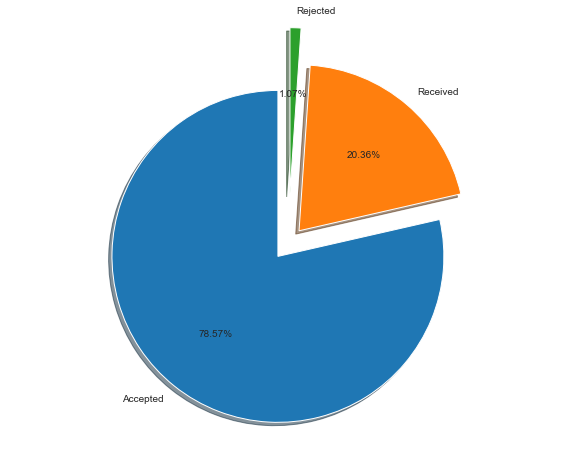

In [279]:
# Plot Rejected Ballots
labels = ['Accepted', 'Received', 'Rejected']
sizes = list(ballots_status)
explode = (0.1, 0.1, 0.3)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Ballots Rejected<a class="anchor" id="ballotsrejected"></a>

In [281]:
# Number of rejected ballots
ballots_rejected = ballots_dataset[ballots_dataset['ballot_status']=='Rejected']
# Percentage
ballots_rejected = pd.DataFrame(ballots_rejected['received_rejReason'].value_counts() / ballots_rejected.shape[0] * 100).reset_index()
# Rename columns header
ballots_rejected.columns = ['reason','count']

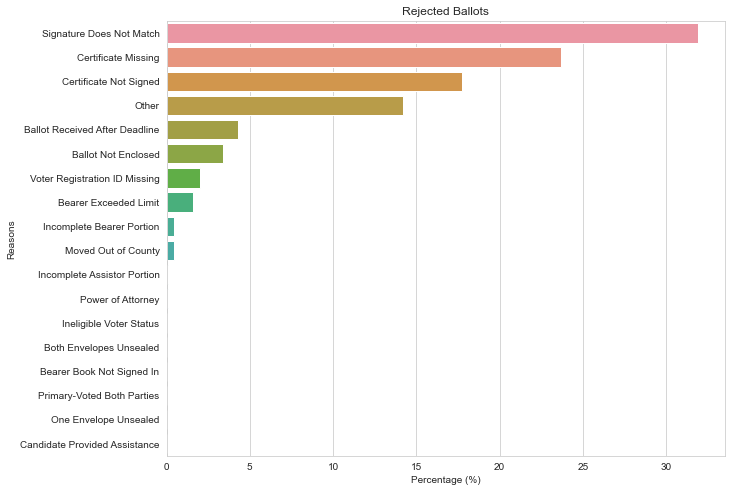

In [282]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='reason', data=ballots_rejected, ax = ax)
plot_var = ax.set(xlabel='Percentage (%)', ylabel='Reasons', title="Rejected Ballots")


In [235]:
# Combine low percentage reasons with Other
others_percent = ballots_rejected[ballots_rejected['reason'].isin(['Ballot Not Enclosed', 'Bearer Exceeded Limit', 'Incomplete Bearer Portion',
 'Moved Out of County', 'Incomplete Assistor Portion', 'Power of Attorney',
 'Ineligible Voter Status', 'Both Envelopes Unsealed', 'Bearer Book Not Signed In',
 'Primary-Voted Both Parties', 'One Envelope Unsealed', 'Candidate Provided Assistance'])]['count'].sum()

In [236]:
ballots_rejected.loc[3,'count'] = ballots_rejected.loc[3,'count'] + others_percent

In [238]:
ballots_rejected.drop(index=
ballots_rejected[ballots_rejected['reason'].isin(['Ballot Not Enclosed', 'Bearer Exceeded Limit', 'Incomplete Bearer Portion',
 'Moved Out of County', 'Incomplete Assistor Portion', 'Power of Attorney',
 'Ineligible Voter Status', 'Both Envelopes Unsealed', 'Bearer Book Not Signed In',
 'Primary-Voted Both Parties', 'One Envelope Unsealed', 'Candidate Provided Assistance'])].index, inplace=True)

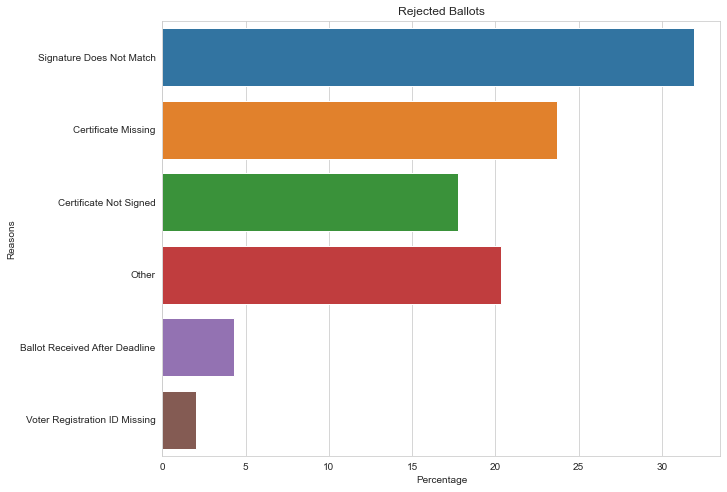

In [275]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='reason', data=ballots_rejected, ax = ax)
plot_var = ax.set(xlabel='Percentage', ylabel='Reasons', title="Rejected Ballots")

<hr>

## Hypothesis Testing<a class="anchor" id="hypothesistesting"></a>

### Party Affiliation vs Ballots Rejected<a class="anchor" id="partyvsrejected"></a>

#### Chi-square (χ2) test for independence (Pearson Chi-square test)
<strong>Hypotheses</strong><br>
Null hypotheses: The two categorical variables are independent (no association between the two variables) ( H0: Oi = Ei )<br>
Alternative hypotheses: The two categorical variables are dependent (there is an association between the two variables) ( Ha: Oi ≠ Ei )<br>
<br>
<strong>Assumptions</strong><br>
1. The two variables are categorical (nominal) and data is randomly sampled<br>
2. The levels of variables are mutually exclusive<br>
3. The expected frequency count for at least 80% of the cell in a contingency table is at least 5<br>
4. The expected frequency count should not be less than 1<br>
5. Observations should be independent of each other<br>
6. Observation data should be frequency counts and not percentages or transformed data<br>

In [18]:
ballots_party = ballots_dataset[ballots_dataset['ballot_status'].isin(['Accepted','Rejected'])][['voter_id','ballot_vtr_party','ballot_status']]
ballots_party.drop_duplicates(inplace=True)
ballots_party.drop('voter_id', axis=1, inplace=True)

In [20]:
data_crosstab = pd.crosstab(ballots_party['ballot_vtr_party'], ballots_party['ballot_status'], margins = False)

In [26]:
g, p, dof, expctd = chi2_contingency(data_crosstab)
print('p-value ->',p, ' < 0.05, we can reject the null hypothesis. The two categorical variables are dependent')

p-value -> 0.0  < 0.05, we can reject the null hypothesis. The two categorical variables are dependent
